(200, 350)


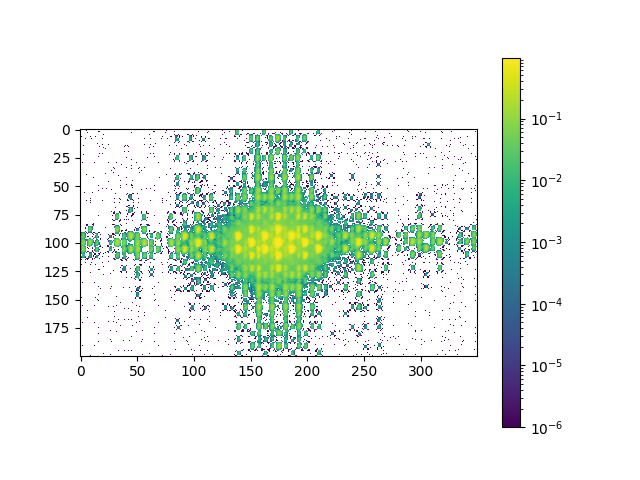

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mtplb
import scipy.ndimage
import numpy as np
from tqdm import tqdm
from PIL import Image
import time
%matplotlib widget
data = np.load("data.npy")
data = np.array(Image.fromarray(data).resize((350,200)))
print(data.shape)
fig,ax = plt.subplots(1)
obj = ax.imshow(data, norm=mtplb.colors.LogNorm(vmin=np.min(np.abs(data)) + 1e-6, vmax=np.max(np.abs(data))))
plt.colorbar(obj, ax=ax)

In [2]:
# grating = np.fft.fftshift(np.fft.ifft2(data))
grating = np.random.rand(*data.shape)
mask = np.zeros_like(data)
mask[20:-20, 20:-20] = 1
mask = np.fft.fftshift(mask)

100%|██████████| 10000/10000 [01:37<00:00, 102.64it/s]


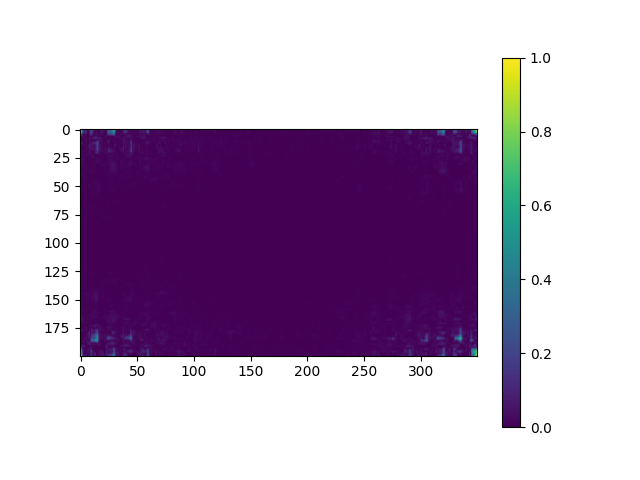

In [30]:
fig,ax = plt.subplots(1)
hio, er = 400, 0
beta = 0.95
for iter in tqdm(range(10000)):
    image = np.fft.fft2(grating)
    image = np.abs(np.fft.fftshift(data)) * np.exp(1j * np.angle(image))
    corr_gr = np.fft.ifft2(image)
    if er > 0:
        corr_gr = corr_gr * mask
        er -= 1
        if er == 0: 
            hio = 400
    if hio > 0:
        corr_gr = corr_gr * mask + (1-mask) * (grating - beta * corr_gr)
        hio -= 1
        if hio == 0: 
            er = 200
    grating = np.abs(corr_gr)
    max_coords = np.unravel_index(np.argmax(grating), grating.shape)
    # print(max_coords)
    grating = np.roll(grating, grating.shape[0] - max_coords[0], axis=0)
    grating = np.roll(grating, grating.shape[1] - max_coords[1], axis=1)
    if (iter % (600*2)) == 0 and iter != 0:
        smearing = scipy.ndimage.filters.gaussian_filter(np.abs(grating), 1.5, mode="nearest")
        smearing -= np.min(smearing)
        smearing /= np.max(np.abs(smearing))
        mask = (smearing > 0.03).astype(int)
        # print("Smearing: ", np.min(smearing), np.max(smearing), "   MASK  ", np.max(mask), np.min(mask))
grating /= np.max(np.abs(grating))
obj = ax.imshow(np.abs(grating))
plt.colorbar(obj, ax=ax)

1 0


Text(0, 0.5, '9.87 mkm')

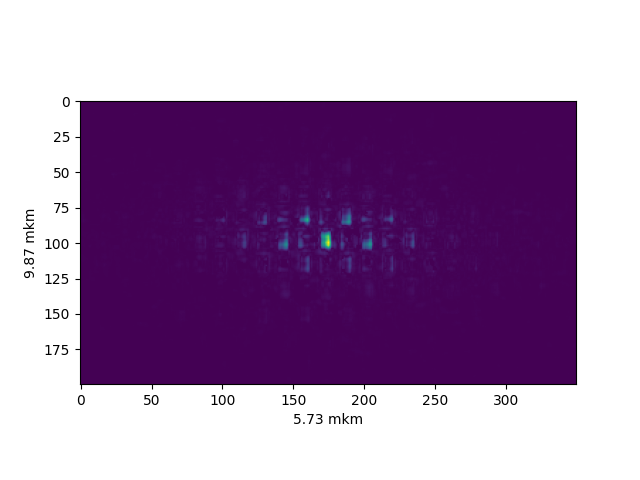

In [46]:
fig,ax = plt.subplots(1)
print(np.max(np.abs(mask)), np.min(np.abs(mask)))
ax.imshow(np.abs(np.fft.fftshift(grating)))#, norm=mtplb.colors.LogNorm(vmin=np.min(np.abs(grating)) + 1e-6, vmax=np.max(np.abs(grating))))
ax.set_xlabel("5.73 mkm")
ax.set_ylabel("9.87 mkm")

Text(0, 0.5, 'mkm')

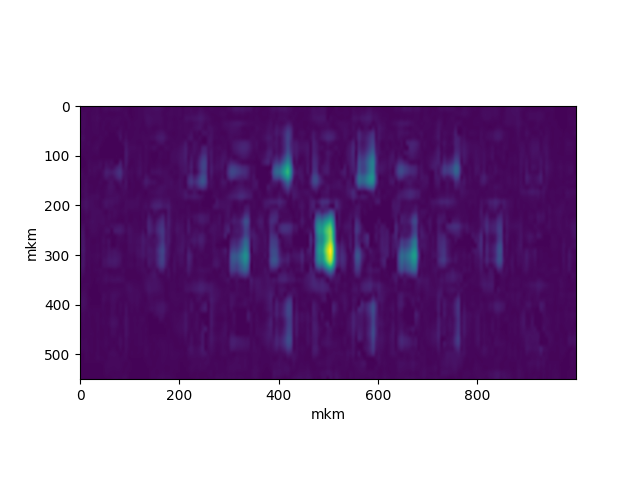

In [51]:
fig,ax = plt.subplots(1, 1)
rec2 = np.array(Image.fromarray(np.fft.fftshift(grating)).resize((int(grating.shape[1]*5.73),int(grating.shape[0]*9.87))))
rec2=rec2[700:1250,500:1500]
ax.imshow(rec2)#, norm=mtplb.colors.LogNorm(vmin=np.min(grating), vmax=np.max(grating)))
ax.set_xlabel("mkm")
ax.set_ylabel("mkm")

1 0


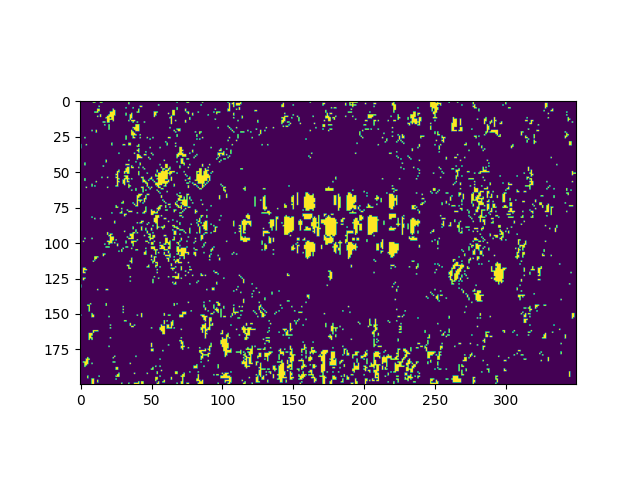

In [17]:
fig,ax = plt.subplots(1)
print(np.max(np.abs(mask)), np.min(np.abs(mask)))
ax.imshow(np.abs(np.fft.fftshift(grating, axes=1))>0.05)#, norm=mtplb.colors.LogNorm(vmin=np.min(np.abs(grating)) + 1e-6, vmax=np.max(np.abs(grating))))

In [12]:
np.save("reconstructed_150k", grating)

1 0


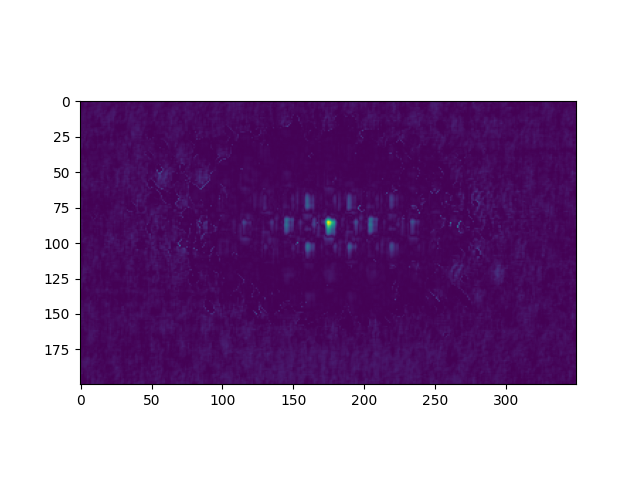

In [20]:
smearing = scipy.ndimage.filters.gaussian_filter(np.abs(grating), 0.3, mode="nearest")
fig,ax = plt.subplots(1)
print(np.max(np.abs(mask)), np.min(np.abs(mask)))
ax.imshow(np.abs(np.fft.fftshift(smearing, axes=1)))#, norm=mtplb.colors.LogNorm(vmin=np.min(np.abs(grating)) + 1e-6, vmax=np.max(np.abs(grating))))

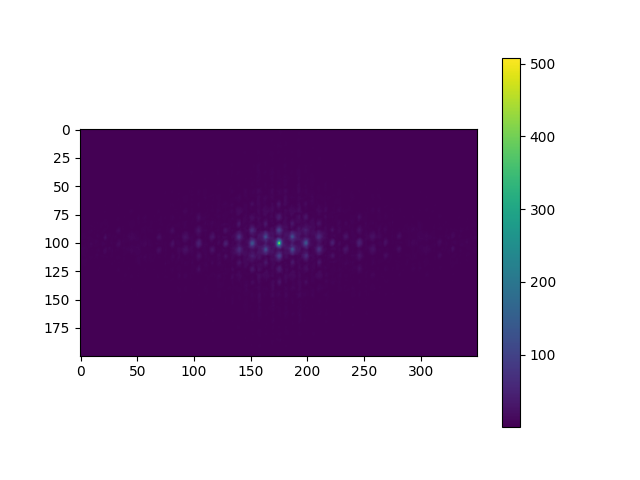

In [45]:
fig,ax = plt.subplots(1)
obj = ax.imshow((np.abs(np.fft.fftshift(np.fft.fft2(grating))) - data/np.max(data)))
plt.colorbar(obj, ax=ax)